Colab Link: https://colab.research.google.com/drive/1BnqV9FjDg0dmwcEz9jk8-ZgZVHcs7GzI?usp=sharing

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import levene
from scipy.stats import f_oneway, shapiro

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
def get_table():
  return pd.read_csv('/content/drive/My Drive/INF2178/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

In [83]:
def graph_barplot(data,x,y,hue,title_name,colsize):
  plt.figure(figsize=(colsize,5),dpi=144)
  p=sns.barplot(data=data,x=x,y=y,hue=hue)
  p.legend(fontsize=6)
  plt.title(title_name,fontsize=9)
  plt.show

In [84]:
def graph_barplot_s(data,x,y,title_name,colsize):
  plt.figure(figsize=(colsize,5),dpi=144)
  p=sns.barplot(data=data,x=x,y=y)
  p.legend(fontsize=1)
  plt.title(title_name,fontsize=9)
  plt.show

In [85]:
def group_fun(table, col_name, id_vars):
  temp = table.groupby(col_name).size().unstack().reset_index(drop=False)
  temp2 = pd.melt(temp,id_vars=id_vars)
  return temp2

In [86]:
def graph_relplot(data,x,y,hue,style,title):
  plt.rcParams['font.size'] = '11'
  p=sns.relplot(data=data, x=x, y=y, hue=hue,style=style, height=7)
  p.set_xticklabels(fontsize=14)
  p.set_xticklabels(fontsize=14)
  p.set_yticklabels(fontsize=14)
  p.set_xlabels(fontsize=14)
  p.set_ylabels(fontsize=14)
  plt.title(title,fontsize=14)
  plt.show()

In [87]:
def line_chart(data,x,y,hue,title_name,style,colsize):
  plt.figure(figsize=(colsize,5),dpi=144)
  p=sns.lineplot(data=data,x=x,y=y,hue=hue,style=style)
  p.legend(fontsize=6)
  plt.title(title_name,fontsize=9)
  plt.show

In [88]:
def graph_lineplot_m(data,x,y,hue,style,title):
  plt.figure(figsize=(7,8),dpi=100)
  p=sns.lineplot(x=x, y=y,hue=hue,style=style,data=data)
  plt.title(title,fontsize=12)
  plt.show()

In [89]:
ass_table = get_table()
#data clean
ass_table = ass_table.replace('Aged 65 years and older','Aged 65 and older')
ass_table = ass_table.replace('Aged 17 years and under','Aged 17 years and younger')
ass_table.loc[ass_table["StripSearch"] == 1, "Booked"] = "1" 
ass_table=ass_table.drop(ass_table[ass_table['Sex']=='U'].index)

In [90]:

#ass_table[['StripSearch','Booked']].head(40)
#ass_table[ass_table["StripSearch"]==1]['Booked']
 

<AxesSubplot:xlabel='Arrest_Year'>

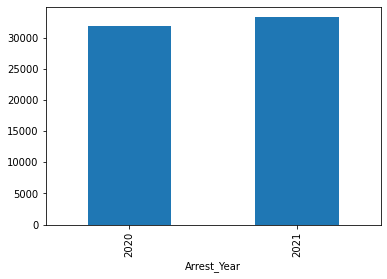

In [91]:
ass_table.groupby(['Arrest_Year']).size().plot(kind="bar")

In [92]:
perceived_count=ass_table['Perceived_Race'].value_counts().rename_axis('Perceived_Race').reset_index(name='count')
perceived_count

,Perceived_Race,count
0,White,27718
1,Black,17526
2,Unknown or Legacy,5053
3,East/Southeast Asian,4415
4,South Asian,3613
5,Middle-Eastern,3237
6,Indigenous,1934
7,Latino,1767


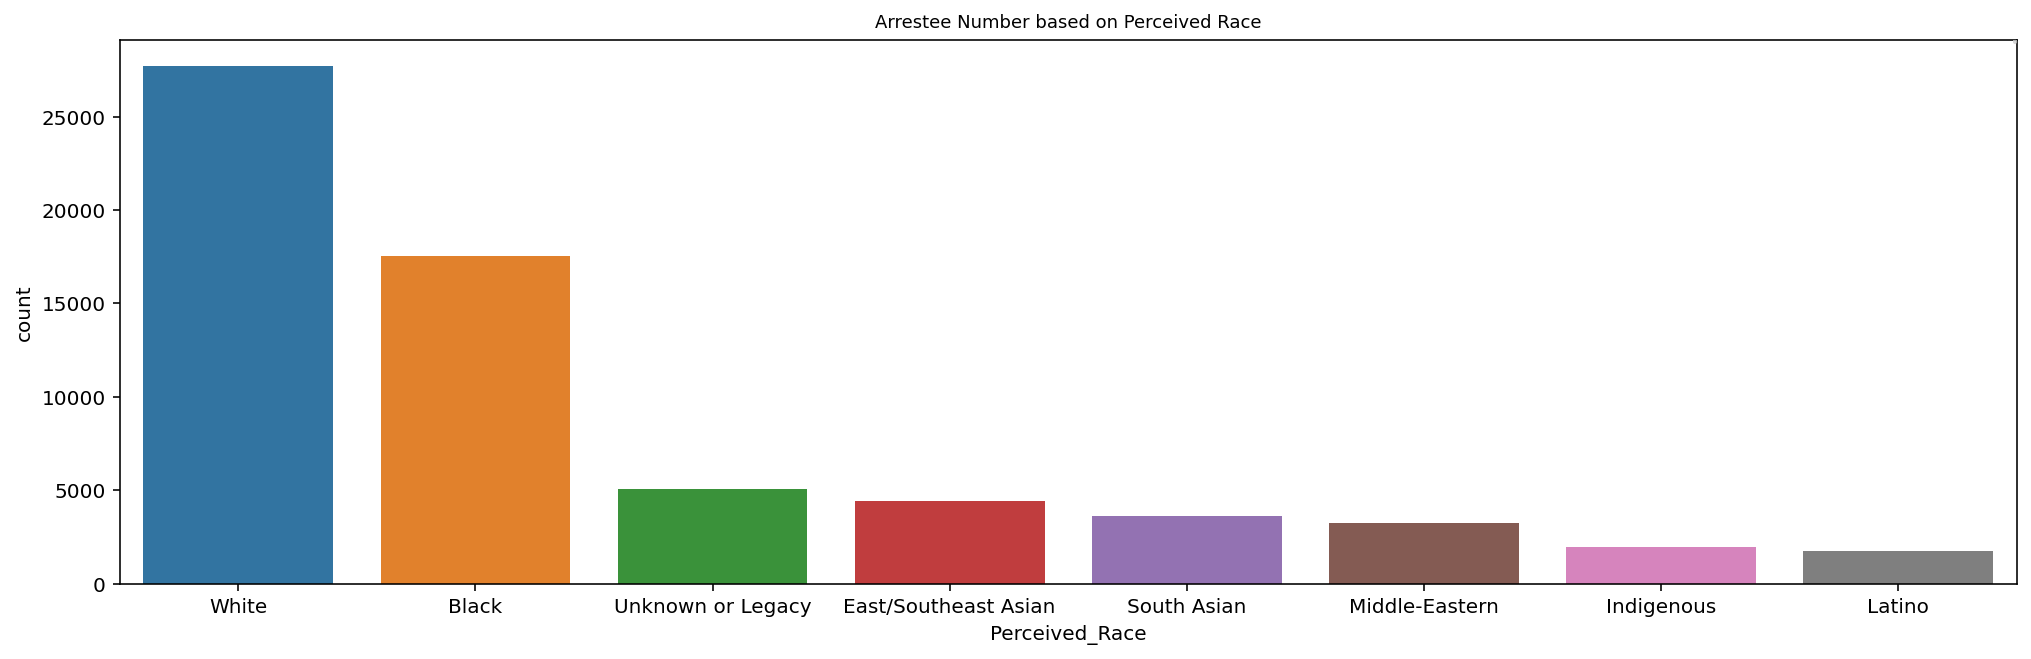

In [93]:
graph_barplot_s(perceived_count,'Perceived_Race','count','Arrestee Number based on Perceived Race',17)

In [94]:
#col_name1=['Sex']
#id_vars1=['Sex']
#sex_table=group_fun(ass_table,col_name1,id_vars1)
#sex_table = ass_table.groupby('').size().unstack().reset_index(drop=False)
sex_table=ass_table['Sex'].value_counts().rename_axis('Sex').reset_index(name='count')
sex_table

,Sex,count
0,M,52650
1,F,12617


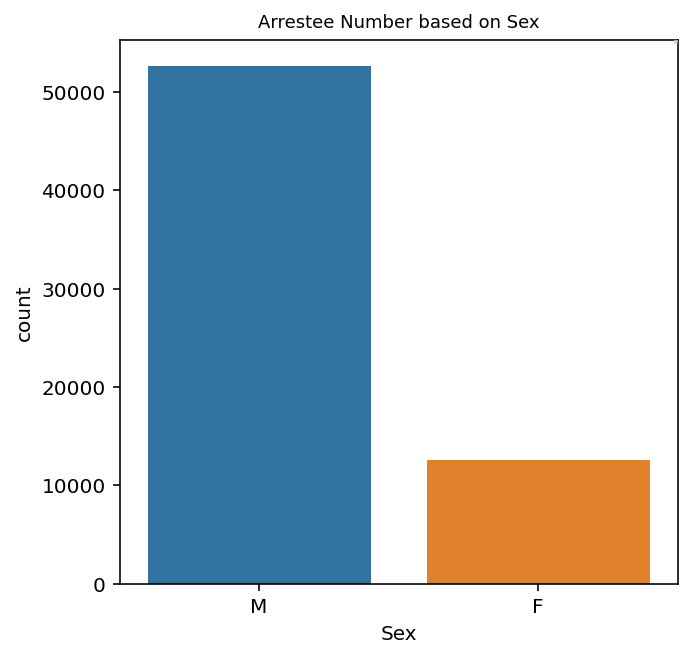

In [95]:
graph_barplot_s(sex_table,'Sex','count','Arrestee Number based on Sex',5)

In [96]:
#graph_barplot(sex_table,"Arrest_Year","value","Sex","Arrest Graph for 2020 and 2021")

In [97]:
col_name2=['Sex','Perceived_Race']
id_vars2=['Sex']
Perceived_Sex_table=group_fun(ass_table,col_name2,id_vars2)
Perceived_Sex_table

,Sex,Perceived_Race,value
0,F,Black,3012
1,M,Black,14514
2,F,East/Southeast Asian,745
3,M,East/Southeast Asian,3670
4,F,Indigenous,629
5,M,Indigenous,1305
6,F,Latino,264
7,M,Latino,1503
8,F,Middle-Eastern,364
9,M,Middle-Eastern,2873


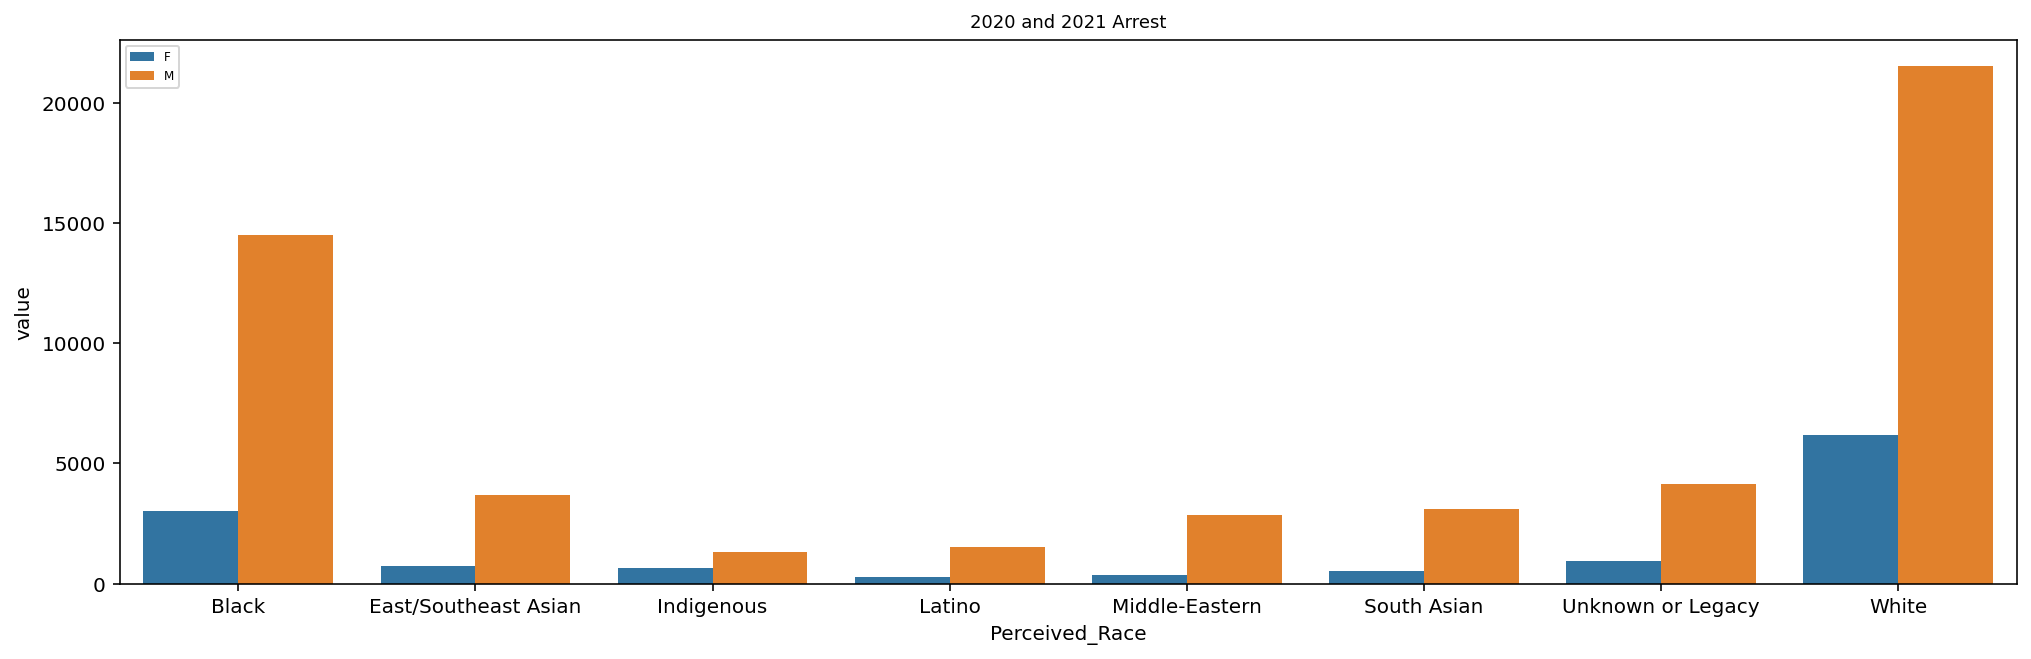

In [98]:
graph_barplot(Perceived_Sex_table,'Perceived_Race','value','Sex','2020 and 2021 Arrest',17)

In [99]:
#table_2020_arrest = Perceived_Race_table.loc[Perceived_Race_table["Arrest_Year"]==2020] 
#table_2021_arrest = Perceived_Race_table.loc[Perceived_Race_table["Arrest_Year"]==2021] 

In [100]:

#graph_barplot(table_2020_arrest,"Sex","value","Perceived_Race","Arrest Graph for 2020")

#graph_barplot(table_2021_arrest,"Sex","value","Perceived_Race","Arrest Graph for 2021")

In [101]:
#sns.relplot(data=Perceived_Race_table, x=Perceived_Race_table["Arrest_Year"], y="value", hue="Perceived_Race",style="Sex", height=7)
#graph_relplot(Perceived_Race_table,"Arrest_Year","value","Perceived_Race","Sex","Arrest Graph for 2020 and 2021")

In [102]:
#a_s_p_table =ass_table.groupby(['Arrest_Year','Sex','Perceived_Race']).size().unstack().reset_index(drop=False)
#a_s_p_table2=pd.melt(a_s_p_table,id_vars=['Arrest_Year','Sex'])

In [103]:
#a_s_p_table2

In [104]:
StripSearch_table =ass_table.groupby(['Arrest_Year','Sex','Perceived_Race','StripSearch']).size().unstack().reset_index(drop=False)
StripSearch_table.head()

StripSearch,Arrest_Year,Sex,Perceived_Race,0,1
0,2020,F,Black,1243.0,239.0
1,2020,F,East/Southeast Asian,311.0,23.0
2,2020,F,Indigenous,223.0,68.0
3,2020,F,Latino,99.0,10.0
4,2020,F,Middle-Eastern,172.0,15.0


In [105]:
# 是否需要更改名字 对youth age and younger 和 youth(aged 17 years and under)
age_table =ass_table.groupby(['Arrest_Year','Sex','Perceived_Race','StripSearch','Youth_at_arrest__under_18_years']).size().unstack().reset_index(drop=False)
age_table.head()

Youth_at_arrest__under_18_years,Arrest_Year,Sex,Perceived_Race,StripSearch,Not a youth,Youth (aged 17 and younger),Youth (aged 17 years and under)
0,2020,F,Black,0,1059.0,184.0,NaN
1,2020,F,Black,1,228.0,11.0,NaN
2,2020,F,East/Southeast Asian,0,287.0,24.0,NaN
3,2020,F,East/Southeast Asian,1,22.0,1.0,NaN
4,2020,F,Indigenous,0,220.0,3.0,NaN


In [106]:
oc_table=ass_table.groupby(['Arrest_Year','Sex','Perceived_Race','StripSearch','Occurrence_Category']).size().unstack().reset_index(drop=False)
oc_table.head()

Occurrence_Category,Arrest_Year,Sex,Perceived_Race,StripSearch,Assault,Assault & Other crimes against persons,Break & Enter,Break and Enter,Crimes against Children,Drug Related,...,Police Category - Incident,Robbery & Theft,Robbery/Theft,Sexual Related Crime,Sexual Related Crimes & Crimes Against Children,Vehicle Related,Vehicle Related (inc. Impaired),Warrant,Weapons,Weapons & Homicide
0,2020,F,Black,0,NaN,361.0,14.0,NaN,NaN,33.0,...,NaN,255.0,NaN,NaN,7.0,NaN,47.0,126.0,NaN,45.0
1,2020,F,Black,1,NaN,49.0,6.0,NaN,NaN,28.0,...,NaN,28.0,NaN,NaN,5.0,NaN,3.0,28.0,NaN,19.0
2,2020,F,East/Southeast Asian,0,NaN,105.0,2.0,NaN,NaN,7.0,...,NaN,83.0,NaN,NaN,1.0,NaN,17.0,13.0,NaN,3.0
3,2020,F,East/Southeast Asian,1,NaN,4.0,NaN,NaN,NaN,5.0,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,1.0
4,2020,F,Indigenous,0,NaN,61.0,5.0,NaN,NaN,10.0,...,NaN,30.0,NaN,NaN,NaN,NaN,3.0,37.0,NaN,2.0


In [107]:
Only_Perceived_table=ass_table.groupby(['Arrest_Year','Perceived_Race']).size().unstack().reset_index(drop=False)

In [108]:
Only_Perceived_table

Perceived_Race,Arrest_Year,Black,East/Southeast Asian,Indigenous,Latino,Middle-Eastern,South Asian,Unknown or Legacy,White
0,2020,8648,2054,999,808,1507,1742,2609,13604
1,2021,8878,2361,935,959,1730,1871,2444,14114


In [109]:
#table_2020_arrest = Perceived_Race_table.loc[Perceived_Race_table["Arrest_Year"]==2020] 
Age_group_table = ass_table.groupby(['Arrest_Year','Sex','Age_group__at_arrest_']).size().unstack().reset_index(drop=False)
Age_group_table

Age_group__at_arrest_,Arrest_Year,Sex,Aged 17 years and younger,Aged 18 to 24 years,Aged 25 to 34 years,Aged 35 to 44 years,Aged 45 to 54 years,Aged 55 to 64 years,Aged 65 and older
0,2020,F,451,1068,2019,1409,744,335,108
1,2020,M,1230,4229,8137,6194,3626,1896,516
2,2021,F,282,1001,2212,1675,858,345,102
3,2021,M,1079,3741,8577,6963,3838,2012,596


In [110]:
ass_table['Aggregated_Negative_behaviors'] = ass_table['Actions_at_arrest___Concealed_i']+ass_table['Actions_at_arrest___Combative__']+ass_table['Actions_at_arrest___Resisted__d']+ass_table['Actions_at_arrest___Mental_inst']+ass_table['Actions_at_arrest___Mental_inst']
Q1_table = ass_table.groupby(['Sex','Perceived_Race','Aggregated_Negative_behaviors']).size().unstack().reset_index(drop=False)
Q1_table=Q1_table.fillna(0)
Q1_table=Q1_table.drop(Q1_table[Q1_table['Sex']=='U'].index)
Q1_table=pd.melt(Q1_table,id_vars=['Sex','Perceived_Race'])
Q1_table.head()

,Sex,Perceived_Race,Aggregated_Negative_behaviors,value
0,F,Black,0,2668.0
1,F,East/Southeast Asian,0,707.0
2,F,Indigenous,0,553.0
3,F,Latino,0,242.0
4,F,Middle-Eastern,0,330.0


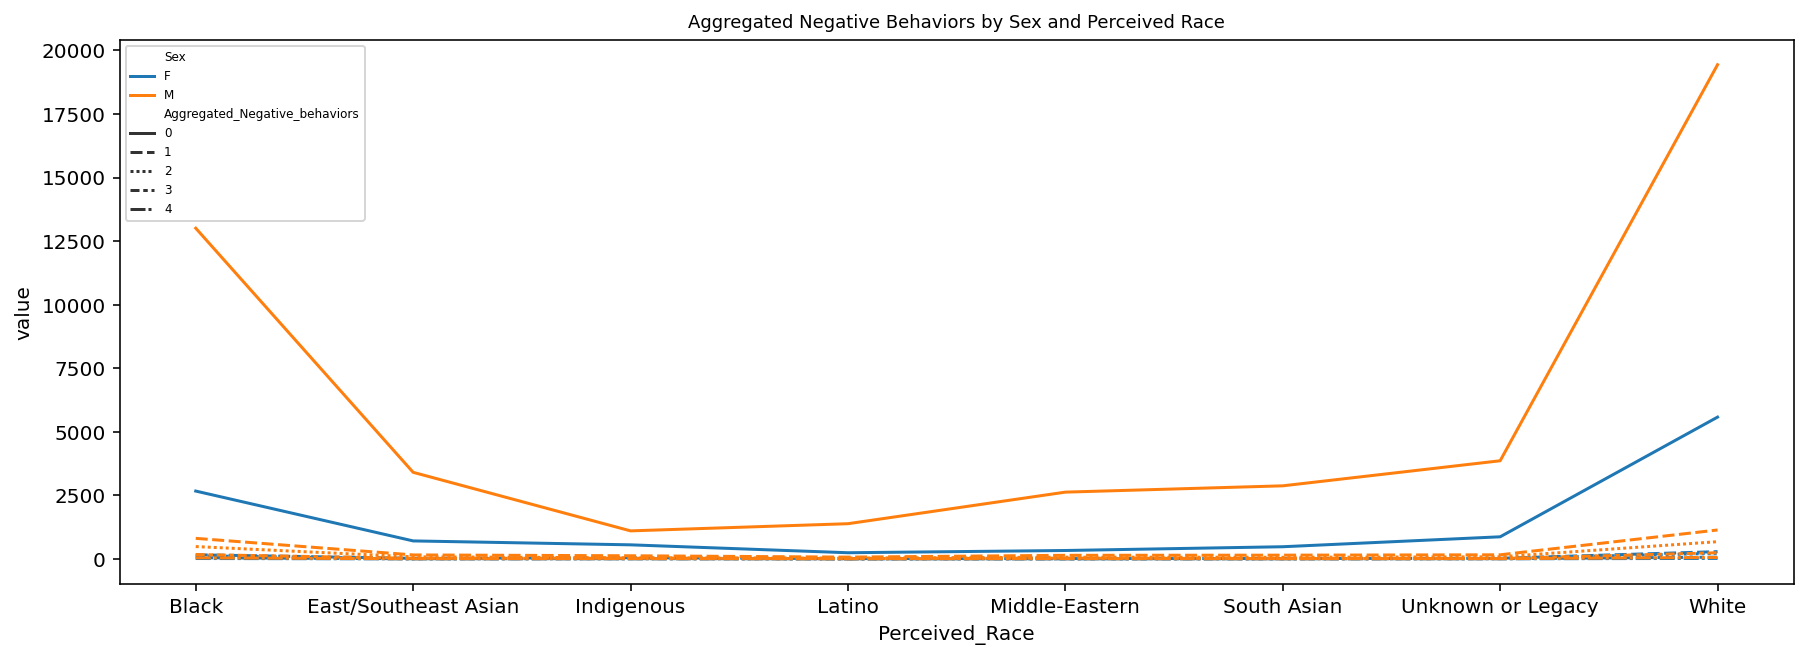

In [111]:
line_chart(Q1_table,'Perceived_Race','value','Sex','Aggregated Negative Behaviors by Sex and Perceived Race','Aggregated_Negative_behaviors',15)

In [112]:
ass_table['Aggregated_Negative_behaviors'].describe()

count    65267.000000
mean         0.153247
std          0.534204
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Aggregated_Negative_behaviors, dtype: float64

<AxesSubplot:xlabel='Aggregated_Negative_behaviors'>

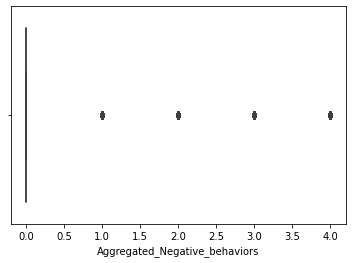

In [113]:
sns.boxplot(x=ass_table['Aggregated_Negative_behaviors'])

In [114]:
arrest_f_table = ass_table.loc[ass_table['Sex'] == "F"]
arrest_m_table = ass_table.loc[ass_table['Sex'] == "M"]
arrest_f_table['Aggregated_Negative_behaviors'].describe()

count    12617.000000
mean         0.160656
std          0.555236
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Aggregated_Negative_behaviors, dtype: float64

<AxesSubplot:xlabel='Aggregated_Negative_behaviors'>

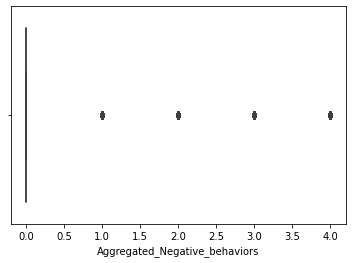

In [115]:
sns.boxplot(x=arrest_f_table['Aggregated_Negative_behaviors'])

In [116]:
arrest_m_table['Aggregated_Negative_behaviors'].describe()

count    52650.000000
mean         0.151472
std          0.529030
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Aggregated_Negative_behaviors, dtype: float64

In [117]:
t_test_arrest=ass_table[['Sex','Aggregated_Negative_behaviors']]
t_test_arrest.head()

,Sex,Aggregated_Negative_behaviors
0,M,0
1,M,0
2,M,0
3,M,0
4,M,0


In [118]:
arrest_group1 = t_test_arrest[t_test_arrest['Sex']=='F']
arrest_group2 = t_test_arrest[t_test_arrest['Sex']=='M']
ttest_ind(arrest_group1['Aggregated_Negative_behaviors'], arrest_group2['Aggregated_Negative_behaviors'])

Ttest_indResult(statistic=1.734501440982696, pvalue=0.0828338716833021)

In [119]:
ass_table['Aggregated_Search_Reasons'] = ass_table['SearchReason_CauseInjury']+ass_table['SearchReason_AssistEscape']+ass_table['SearchReason_PossessWeapons']+ass_table['SearchReason_PossessEvidence']

In [120]:
temp = ass_table[ass_table.StripSearch==1]
Q2_table = temp.groupby(['Sex','Perceived_Race','Aggregated_Search_Reasons']).size().unstack().reset_index(drop=False)
Q2_table=Q2_table.fillna(0)
Q2_table=Q2_table.drop(Q2_table[Q2_table['Sex']=='U'].index)
Q2_table=pd.melt(Q2_table,id_vars=['Sex','Perceived_Race'])
Q2_table.head()

,Sex,Perceived_Race,Aggregated_Search_Reasons,value
0,F,Black,0.0,28.0
1,F,East/Southeast Asian,0.0,0.0
2,F,Indigenous,0.0,13.0
3,F,Latino,0.0,1.0
4,F,Middle-Eastern,0.0,2.0


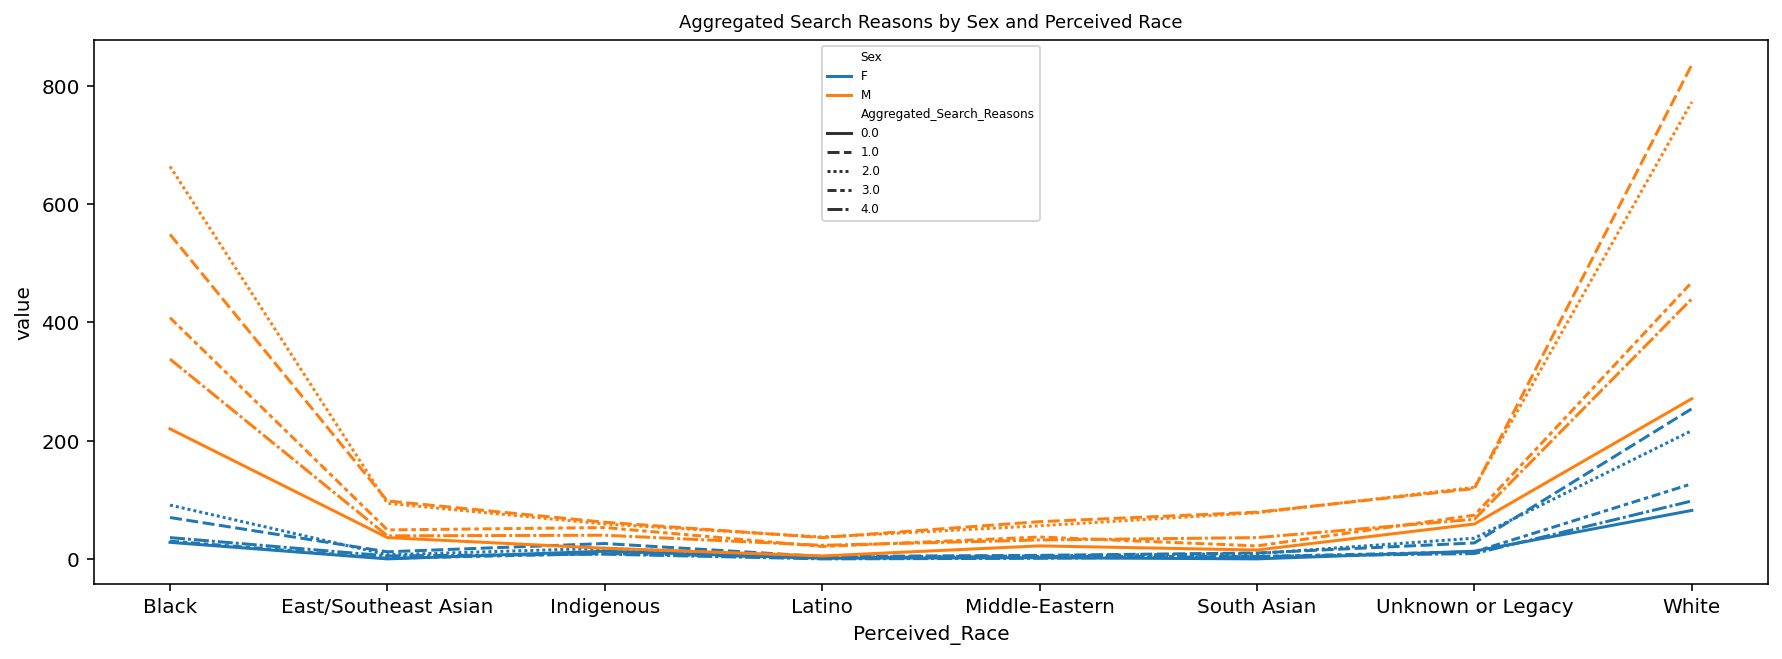

In [121]:
line_chart(Q2_table,'Perceived_Race','value','Sex','Aggregated Search Reasons by Sex and Perceived Race','Aggregated_Search_Reasons',15)

In [122]:
Strip_S_table=ass_table[ass_table.StripSearch==1]
Strip_S_table['Aggregated_Search_Reasons'].describe()

count    7801.000000
mean        1.981156
std         1.209695
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Aggregated_Search_Reasons, dtype: float64

In [123]:
Strip_S_table_F=Strip_S_table.loc[Strip_S_table['Sex'] == "F"]
Strip_S_table_F['Aggregated_Search_Reasons'].describe()

count    1283.000000
mean        1.862822
std         1.176292
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Aggregated_Search_Reasons, dtype: float64

<AxesSubplot:xlabel='Aggregated_Search_Reasons'>

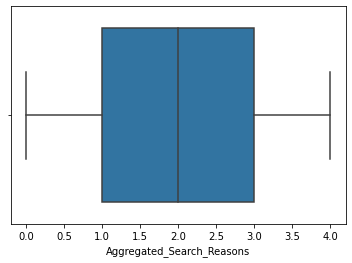

In [124]:
sns.boxplot(x=Strip_S_table_F['Aggregated_Search_Reasons'])

In [125]:
Strip_S_table_M=Strip_S_table.loc[Strip_S_table['Sex'] == "M"]
Strip_S_table_M['Aggregated_Search_Reasons'].describe()

count    6518.000000
mean        2.004449
std         1.214893
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Aggregated_Search_Reasons, dtype: float64

<AxesSubplot:xlabel='Aggregated_Search_Reasons'>

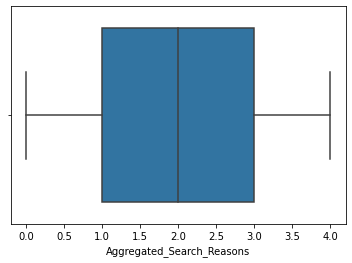

In [126]:
sns.boxplot(x=Strip_S_table_M['Aggregated_Search_Reasons'])

<AxesSubplot:xlabel='Aggregated_Search_Reasons', ylabel='Sex'>

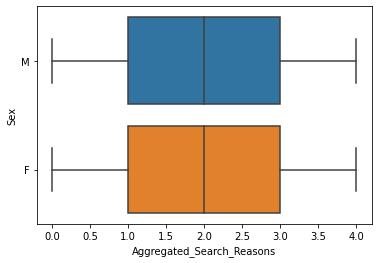

In [127]:
sns.boxplot(x=ass_table['Aggregated_Search_Reasons'],y=ass_table['Sex'])

<AxesSubplot:xlabel='Aggregated_Search_Reasons'>

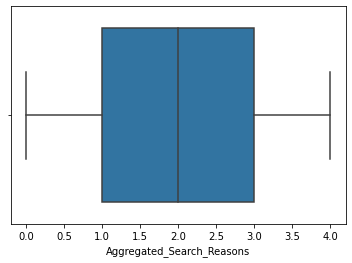

In [128]:
sns.boxplot(x=ass_table['Aggregated_Search_Reasons'])

In [129]:
t_test_sex_search=Strip_S_table[['Sex','Aggregated_Search_Reasons']]
t_test_sex_search.head()

,Sex,Aggregated_Search_Reasons
12,M,3.0
14,M,3.0
21,M,1.0
33,M,2.0
38,M,2.0


In [130]:
group1 = t_test_sex_search[t_test_sex_search['Sex']=='F']
group2 = t_test_sex_search[t_test_sex_search['Sex']=='M']
ttest_ind(group1['Aggregated_Search_Reasons'], group2['Aggregated_Search_Reasons'])

Ttest_indResult(statistic=-3.836623571021187, pvalue=0.00012572162046602353)

In [131]:
Strip_Search_Sex = ass_table.groupby(['Sex','Aggregated_Search_Reasons']).size().unstack().reset_index(drop=False)
Strip_Search_Sex=Strip_Search_Sex.fillna(0)
Strip_Search_Sex=Strip_Search_Sex.drop(Strip_Search_Sex[Strip_Search_Sex['Sex']=='U'].index)
Strip_Search_Sex

Aggregated_Search_Reasons,Sex,0.0,1.0,2.0,3.0,4.0
0,F,139,409,385,189,161
1,M,646,1842,1882,1133,1015


In [132]:
Strip_Search_F=Strip_Search_Sex.loc[Strip_Search_Sex['Sex'] == "F"]
Strip_Search_M=Strip_Search_Sex.loc[Strip_Search_Sex['Sex'] == "M"]
Strip_Search_F=np.array(Strip_Search_F.iloc[0])
Strip_Search_F=np.delete(Strip_Search_F,0)
Strip_Search_M=np.array(Strip_Search_M.iloc[0])
Strip_Search_M=np.delete(Strip_Search_M,0)

In [133]:
diffs=Strip_Search_M-Strip_Search_F
bound=0.5

In [134]:
_, p_greater = stats.ttest_1samp(diffs, -bound, alternative='greater')
_, p_less = stats.ttest_1samp(diffs, bound, alternative='less')
pval = max(p_less, p_greater)

In [135]:
print(f'TOST: p = {pval:5.3f}')

TOST: p = 0.998


In [136]:
T_avova1=ass_table[['Sex','Perceived_Race','Aggregated_Negative_behaviors']]
# Performing two-way ANOVA
model = ols('Aggregated_Negative_behaviors ~ C(Sex) + C(Perceived_Race) +\
C(Sex):C(Perceived_Race)',
            data=T_avova1).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                               df        sum_sq   mean_sq          F  \
C(Sex)                        1.0      0.859223  0.859223   3.019575   
C(Perceived_Race)             7.0     53.332993  7.618999  26.775522   
C(Sex):C(Perceived_Race)      7.0      4.840069  0.691438   2.429929   
Residual                  65247.0  18566.092977  0.284551        NaN   

                                PR(>F)  
C(Sex)                    8.226976e-02  
C(Perceived_Race)         5.959743e-37  
C(Sex):C(Perceived_Race)  1.734509e-02  
Residual                           NaN  


In [137]:
T_avova1['Perceived_Race'] = T_avova1['Perceived_Race'].apply(str)
tukey1 = pairwise_tukeyhsd(T_avova1['Aggregated_Negative_behaviors'],T_avova1['Perceived_Race'],alpha=0.05)
print(tukey1)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.0688  0.001 -0.0967  -0.041   True
               Black           Indigenous   0.0565  0.001  0.0169  0.0962   True
               Black               Latino  -0.0495 0.0062 -0.0908 -0.0082   True
               Black       Middle-Eastern  -0.0331 0.0323 -0.0648 -0.0015   True
               Black          South Asian  -0.0661  0.001 -0.0963 -0.0359   True
               Black    Unknown or Legacy  -0.0735  0.001 -0.0999  -0.047   True
               Black                White  -0.0142 0.1277 -0.0302  0.0018  False
               Black                  nan  -0.1746    0.9  -1.002  0.6529  False
East/Southeast Asian           Indigenous   0.1254  0.001  0.0802  0.1705   True
East/Southeast Asian        

<ipython-input-137-f31d8647f4e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_avova1['Perceived_Race'] = T_avova1['Perceived_Race'].apply(str)


In [138]:
levene_test_arr_perceived_race = levene(T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'White'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'Unknown or Legacy'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'Black'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'Middle-Eastern'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'Indigenous'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'South Asian'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'East/Southeast Asian'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Perceived_Race']== 'Latino']  
                     )
print(f"Levene's test: statistic={levene_test_arr_perceived_race.statistic:.3f}, p-value={levene_test_arr_perceived_race.pvalue:.3f}")

Levene's test: statistic=27.056, p-value=0.000


In [139]:
levene_test_arr_sex = levene(T_avova1['Aggregated_Negative_behaviors'][T_avova1['Sex'] == 'F'],
                     T_avova1['Aggregated_Negative_behaviors'][T_avova1['Sex'] == 'M'])
print(f"Levene's test: statistic={levene_test_arr_sex.statistic:.3f}, p-value={levene_test_arr_sex.pvalue:.3f}")

Levene's test: statistic=3.008, p-value=0.083


In [140]:
group11=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'Latino')]['Aggregated_Negative_behaviors']
group12=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'East/Southeast Asian')]['Aggregated_Negative_behaviors']
group13=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'South Asian')]['Aggregated_Negative_behaviors']
group14=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'Indigenous')]['Aggregated_Negative_behaviors']
group15=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'Black')]['Aggregated_Negative_behaviors']
group16=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'Unknown or Legacy')]['Aggregated_Negative_behaviors']
group17=T_avova1[(T_avova1['Sex'] == 'F') & (T_avova1['Perceived_Race'] == 'Middle-Eastern')]['Aggregated_Negative_behaviors']
group21=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'Latino')]['Aggregated_Negative_behaviors']
group22=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'East/Southeast Asian')]['Aggregated_Negative_behaviors']
group23=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'South Asian')]['Aggregated_Negative_behaviors']
group24=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'Indigenous')]['Aggregated_Negative_behaviors']
group25=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'Black')]['Aggregated_Negative_behaviors']
group26=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'Unknown or Legacy')]['Aggregated_Negative_behaviors']
group27=T_avova1[(T_avova1['Sex'] == 'M') & (T_avova1['Perceived_Race'] == 'Middle-Eastern')]['Aggregated_Negative_behaviors']

shapiro_results11 = stats.shapiro(group11)
shapiro_results12 = stats.shapiro(group12)
shapiro_results13 = stats.shapiro(group13)
shapiro_results14 = stats.shapiro(group14)
shapiro_results15 = stats.shapiro(group15)
shapiro_results16 = stats.shapiro(group16)
shapiro_results17 = stats.shapiro(group17)

shapiro_results21 = stats.shapiro(group21)
shapiro_results22 = stats.shapiro(group22)
shapiro_results23 = stats.shapiro(group23)
shapiro_results24 = stats.shapiro(group24)
shapiro_results25 = stats.shapiro(group25)
shapiro_results26 = stats.shapiro(group26)
shapiro_results27 = stats.shapiro(group27)

# Check normality assumption
alpha = 0.05
if all(p > alpha for p in [shapiro_results11[1], shapiro_results12[1],shapiro_results13[1], shapiro_results14[1],shapiro_results15[1], shapiro_results16[1],shapiro_results17[1],
                           shapiro_results21[1], shapiro_results22[1],shapiro_results23[1], shapiro_results24[1],shapiro_results25[1], shapiro_results26[1],shapiro_results27[1]]):
    print("Assumption of normality is met.")
else:
    print("Assumption of normality is violated.")

Assumption of normality is violated.


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [141]:
T_avova2=Strip_S_table[['Sex','Perceived_Race','Aggregated_Search_Reasons']]
# Performing two-way ANOVA
model = ols('Aggregated_Search_Reasons ~ C(Sex) + C(Perceived_Race) +\
C(Sex):C(Perceived_Race)',
            data=T_avova2).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                              df        sum_sq    mean_sq          F    PR(>F)
C(Sex)                       1.0     21.455509  21.455509  14.699189  0.000127
C(Perceived_Race)            7.0     16.448488   2.349784   1.609839  0.127497
C(Sex):C(Perceived_Race)     7.0     13.457549   1.922507   1.317111  0.237430
Residual                  7784.0  11361.830249   1.459639        NaN       NaN


In [142]:
tukey2 = pairwise_tukeyhsd(Strip_S_table['Aggregated_Search_Reasons'],Strip_S_table['Sex'],alpha=0.05)
print(tukey2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
     F      M   0.1416 0.001 0.0693 0.214   True
------------------------------------------------


In [143]:
levene_test_ser_sex = levene(Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Sex'] == 'F'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Sex'] == 'M'])
print(f"Levene's test: statistic={levene_test_ser_sex.statistic:.3f}, p-value={levene_test_ser_sex.pvalue:.3f}")

Levene's test: statistic=2.075, p-value=0.150


In [144]:
levene_test_ser_perceived_race = levene(Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'White'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'Unknown or Legacy'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'Black'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'Middle-Eastern'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'Indigenous'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'South Asian'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'East/Southeast Asian'],
                     Strip_S_table['Aggregated_Search_Reasons'][Strip_S_table['Perceived_Race']== 'Latino']  
                     )
print(f"Levene's test: statistic={levene_test_ser_perceived_race.statistic:.3f}, p-value={levene_test_ser_perceived_race.pvalue:.3f}")

Levene's test: statistic=1.165, p-value=0.319


In [145]:
SW_table=Strip_S_table[['Sex','Perceived_Race','Aggregated_Search_Reasons']].reset_index()

group11=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'Latino')]['Aggregated_Search_Reasons']
group12=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'East/Southeast Asian')]['Aggregated_Search_Reasons']
group13=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'South Asian')]['Aggregated_Search_Reasons']
group14=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'Indigenous')]['Aggregated_Search_Reasons']
group15=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'Black')]['Aggregated_Search_Reasons']
group16=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'Unknown or Legacy')]['Aggregated_Search_Reasons']
group17=SW_table[(SW_table['Sex'] == 'F') & (SW_table['Perceived_Race'] == 'Middle-Eastern')]['Aggregated_Search_Reasons']
group21=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'Latino')]['Aggregated_Search_Reasons']
group22=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'East/Southeast Asian')]['Aggregated_Search_Reasons']
group23=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'South Asian')]['Aggregated_Search_Reasons']
group24=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'Indigenous')]['Aggregated_Search_Reasons']
group25=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'Black')]['Aggregated_Search_Reasons']
group26=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'Unknown or Legacy')]['Aggregated_Search_Reasons']
group27=SW_table[(SW_table['Sex'] == 'M') & (SW_table['Perceived_Race'] == 'Middle-Eastern')]['Aggregated_Search_Reasons']

shapiro_results11 = stats.shapiro(group11)
shapiro_results12 = stats.shapiro(group12)
shapiro_results13 = stats.shapiro(group13)
shapiro_results14 = stats.shapiro(group14)
shapiro_results15 = stats.shapiro(group15)
shapiro_results16 = stats.shapiro(group16)
shapiro_results17 = stats.shapiro(group17)

shapiro_results21 = stats.shapiro(group21)
shapiro_results22 = stats.shapiro(group22)
shapiro_results23 = stats.shapiro(group23)
shapiro_results24 = stats.shapiro(group24)
shapiro_results25 = stats.shapiro(group25)
shapiro_results26 = stats.shapiro(group26)
shapiro_results27 = stats.shapiro(group27)

# Check normality assumption
alpha = 0.05
if all(p > alpha for p in [shapiro_results11[1], shapiro_results12[1],shapiro_results13[1], shapiro_results14[1],shapiro_results15[1], shapiro_results16[1],shapiro_results17[1],
                           shapiro_results21[1], shapiro_results22[1],shapiro_results23[1], shapiro_results24[1],shapiro_results25[1], shapiro_results26[1],shapiro_results27[1]]):
    print("Assumption of normality is met.")
else:
    print("Assumption of normality is violated.")


Assumption of normality is violated.
